In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import color, data, io
from skimage.filters import roberts, sobel

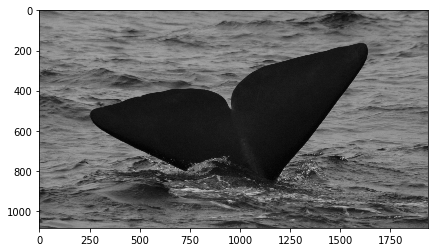

In [2]:
tail_img = skimage.io.imread("C:/VuNguyen/Study/Capgemini data science challenge 2020/data/train/2352/PM-WWA-20050628-107.jpg")
tail_gray = color.rgb2gray(tail_img)
plt.figure(figsize=(9, 4))
plt.imshow(tail_gray, cmap='gray')

## Roberts Cross Edge Detector

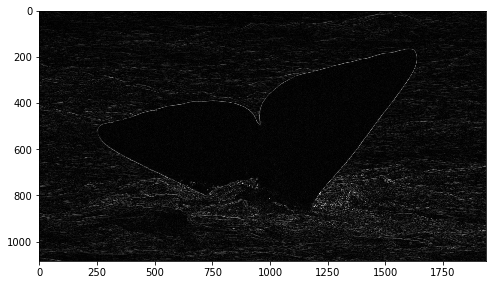

In [5]:
tail_img_roberts = roberts(tail_gray)  

plt.figure(figsize=(8,8))
plt.imshow(tail_img_roberts, cmap='gray')

## Sobel Edge Detector

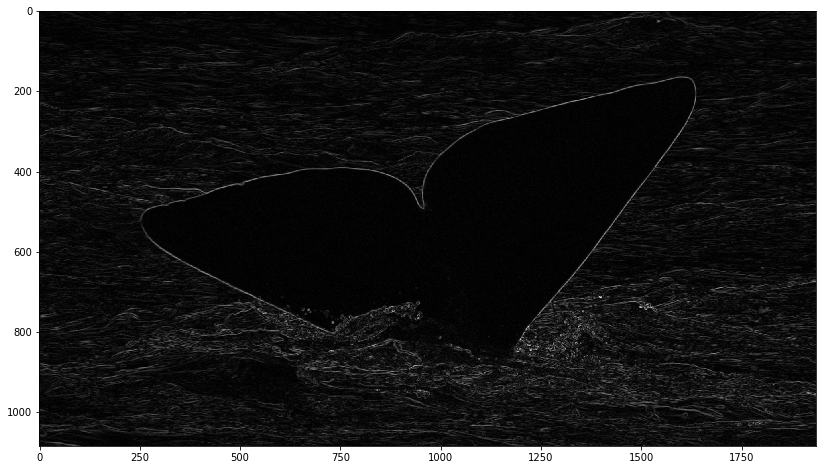

In [28]:
tail_img_sobel = sobel(tail_gray)  

plt.figure(figsize=(16,8))
plt.imshow(tail_img_sobel, cmap='gray')

In [49]:
max_gray = tail_img_sobel.max()
min_gray = tail_img_sobel.min()
# Apply a mask of 10% darkest grayscale of gray image
mask_threshold = min_gray + (max_gray - min_gray)  * 0.1
img_mask = tail_img_sobel < mask_threshold

In [50]:
from skimage import measure
contours = measure.find_contours(img_mask, 0.99) 
len(contours)

10816

In [51]:
# Find the largest contour in the list of contours
largest_contour = contours[0]
largest_contour_size = contours[0].shape[0]
for c in contours:
    if c.shape[0] > largest_contour_size:
        largest_contour_size = c.shape[0]
        largest_contour = c

In [52]:
largest_contour

array([[1021.  , 1563.99],
       [1020.01, 1563.  ],
       [1020.  , 1562.99],
       ...,
       [1021.99, 1562.  ],
       [1021.99, 1563.  ],
       [1021.  , 1563.99]])

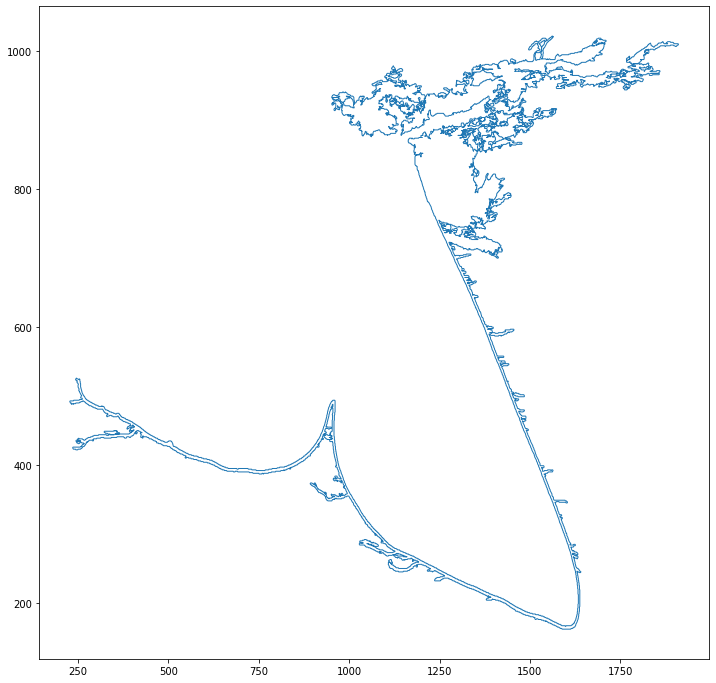

In [54]:
plt.figure(figsize=(12,12)) 
#plt.imshow(img_mask, interpolation='nearest', cmap = "gray")
plt.plot(largest_contour[:, 1], largest_contour[:, 0],  linewidth=1)   